In [1]:
import os
import sqlite3

In [2]:
# Ustal ścieżkę do pliku bazy danych
db_dir = r"sqlite-dll-win-x64-3490100"
db_file = "produktionsmanagement.db"
db_path = os.path.join(db_dir, db_file)

# Nawiąż połączenie z bazą danych
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Wykonaj zapytanie SELECT, aby pobrać wszystkie dane z tabeli "przykladowa_tabela"
cursor.execute("SELECT * FROM produktion_70058")
rows = cursor.fetchall()

# Opcjonalnie, pobierz nazwy kolumn
column_names = [description[0] for description in cursor.description]
print(column_names)

# Wyświetl pobrane rekordy
if rows:
    for row in rows:
        print(row)
else:
    print("Tabela jest pusta.")

# Zamknij połączenie z bazą danych
conn.close()


['HESS-LP', 'Artikel-Nr.', 'Zeichnungs-Nr. Index', 'Artikelname', 'Einheit', 'Rusten', 'Mindestmenge', 'täglicher Verzehr', 'Sicherheitsbestand', 'Lieferzeit']
('SmartBin 6/32', '0002877', 'BN10649 M06x30 _', 'Linsenchraube m. I-6rund', 'Stuck', 1.0, 21.0, 1.0, 7, 14)
('SmartBin 3/7', '0003011', 'BN161 M06 B', 'Sicherungsmutter nied. Form', 'Stuck', 2.0, 42.0, 2.0, 7, 14)
('A04-168', '0003433', 'BN5952 M04x12', 'Linsenchraube eco-fix', 'Stuck', 6.0, 126.0, 6.0, 7, 14)
('W13(9)7', '0003498', 'BN611 M08x50 _', 'Zyl-Schraube m.I-6kt m.Schaft', 'Stuck', 5.0, 105.0, 5.0, 7, 14)
(None, '0003518', 'BN616 M03x10 _', 'Senkchrauben m.I-6kt', 'Stuck', 2.0, 42.0, 2.0, 7, 14)
('A04-108', '0003535', 'BN616 M06x40 A', 'Senkchraube m.I-6kt', 'Stuck', 1.0, 21.0, 1.0, 7, 14)
('SmartBin 5/8', '0003541', 'BN616 M08x20 B', 'Senkschraube m.I-6kt', 'Stuck', 2.0, 42.0, 2.0, 7, 14)
('SmartBin 7/43', '0003942', 'BN697 ST3,5x13 A', 'Lsk-Blechschraube', 'Stuck', 4.0, 84.0, 4.0, 7, 14)
('A08-168', '0003979', 'BN71

In [49]:
import os
import sqlite3
import pandas as pd

# Ustal ścieżkę do katalogu i bazy danych
db_dir = 'sqlite-dll-win-x64-3490100'
db_path = os.path.join(db_dir, 'produktionsmanagement.db')

# Nawiąż połączenie z bazą danych
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Połączenie z bazą danych zostało nawiązane.")

# Przygotuj zapytanie SQL, które łączy obie tabele na podstawie kolumny "Artikel-Nr."
# i wylicza dodatkową kolumnę "Do Zamówienia" jako (Mindestmenge - Menge)
query = '''
SELECT
    p."Artikel-Nr.",
    p."Artikelname",
    p."Mindestmenge",
    t."Menge",
    (p."Mindestmenge" - t."Menge") AS "Do Zamówienia"
FROM produktion_70058 p
JOIN teilelager t ON p."Artikel-Nr." = t."Artikel-Nr."
WHERE t."Menge" < p."Mindestmenge"
'''

cursor.execute(query)
results = cursor.fetchall()

# Określ nazwy kolumn odpowiadających zapytaniu
columns = ["Artikel-Nr.", "Artikelname", "Mindestmenge", "Menge", "Do Zamówienia"]

if results:
    print("Poniższe części mogą być niewystarczające do produkcji (Menge < Mindestmenge):")
    for row in results:
        print(f"Artikel-Nr.: {row[0]}, Nazwa: {row[1]}, Mindestmenge: {row[2]}, Menge: {row[3]}, Do Zamówienia: {row[4]}")
else:
    print("Brak części, dla których stan magazynowy byłby niższy niż wymagana ilość.")

# Konwertuj wyniki do DataFrame
df_results = pd.DataFrame(results, columns=columns)

# Zapisz wyniki do pliku Excel
output_file = 'wyniki_zamowien.xlsx'
df_results.to_excel(output_file, index=False)
print(f"Wyniki zapisano do pliku: {output_file}")

conn.close()
print("Proces zakończony.")


Połączenie z bazą danych zostało nawiązane.
Poniższe części mogą być niewystarczające do produkcji (Menge < Mindestmenge):
Artikel-Nr.: 0002877, Nazwa: Linsenchraube m. I-6rund, Mindestmenge: 21.0, Menge: 10, Do Zamówienia: 11.0
Artikel-Nr.: 0003011, Nazwa: Sicherungsmutter nied. Form, Mindestmenge: 42.0, Menge: 25, Do Zamówienia: 17.0
Artikel-Nr.: 0003433, Nazwa: Linsenchraube eco-fix, Mindestmenge: 126.0, Menge: 80, Do Zamówienia: 46.0
Artikel-Nr.: 0003498, Nazwa: Zyl-Schraube m.I-6kt m.Schaft, Mindestmenge: 105.0, Menge: 89, Do Zamówienia: 16.0
Artikel-Nr.: 0003541, Nazwa: Senkschraube m.I-6kt, Mindestmenge: 42.0, Menge: 35, Do Zamówienia: 7.0
Artikel-Nr.: 0003942, Nazwa: Lsk-Blechschraube, Mindestmenge: 84.0, Menge: 23, Do Zamówienia: 61.0
Artikel-Nr.: 0003979, Nazwa: Scheibe, Mindestmenge: 84.0, Menge: 23, Do Zamówienia: 61.0
Artikel-Nr.: 0038536, Nazwa: Magna-Lok-Niet / Senkkopf, Mindestmenge: 42.0, Menge: 12, Do Zamówienia: 30.0
Artikel-Nr.: 0073668, Nazwa: Senkschraube m.I-6kt,

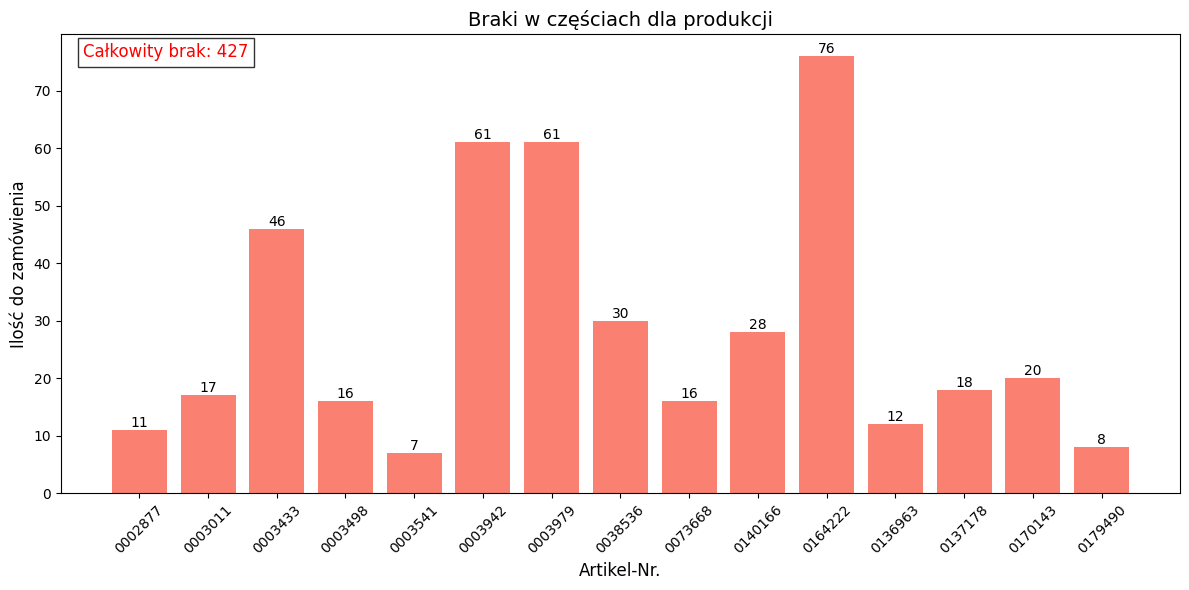

In [50]:
import matplotlib.pyplot as plt

# Zakładamy, że df_results został już utworzony na podstawie zapytania SQL
# i zawiera kolumny: "Artikel-Nr.", "Artikelname", "Mindestmenge", "Menge", "Do Zamówienia"

# Filtrowanie, aby pozostawić tylko te wiersze, gdzie Do Zamówienia > 0.
df_filtered = df_results[df_results["Do Zamówienia"] > 0]

# Oblicz całkowity brak (suma kolumny "Do Zamówienia")
total_missing = df_filtered["Do Zamówienia"].sum()

# Ustaw rozmiar wykresu
plt.figure(figsize=(12, 6))

# Tworzymy wykres słupkowy tylko dla artykułów, w których Do Zamówienia > 0.
bars = plt.bar(df_filtered["Artikel-Nr."], df_filtered["Do Zamówienia"], color='salmon')

# Ustaw etykiety osi
plt.xlabel("Artikel-Nr.", fontsize=12)
plt.ylabel("Ilość do zamówienia", fontsize=12)
plt.title("Braki w częściach dla produkcji", fontsize=14)

# Obróć etykiety na osi X, aby były czytelne
plt.xticks(rotation=45)

# Dodaj adnotacje z wartością nad każdym słupkiem
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Dodaj całkowitą sumę braków jako adnotację na wykresie – np. w lewym górnym rogu
plt.text(0.02, 0.95, f"Całkowity brak: {int(total_missing)}", transform=plt.gca().transAxes,
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()

# Zapisz wykres do pliku
plt.savefig('wykres_braki.png', dpi=300)

# Wyświetl wykres
plt.show()


In [51]:
import os
import sqlite3
import pandas as pd

# -------------------------------
# Krok 1: Połączenie z bazą danych
# -------------------------------
db_dir = 'sqlite-dll-win-x64-3490100'
db_path = os.path.join(db_dir, 'produktionsmanagement.db')
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Połączenie z bazą danych zostało nawiązane.")

# -------------------------------
# Krok 2: Pobranie i przygotowanie danych
# -------------------------------
# Zapytanie SQL pobiera dane z tabeli produktion_70058 oraz teilelager,
# obliczając dodatkowo "Do Zamówienia" = Mindestmenge - Menge
query = '''
SELECT
    p."Artikel-Nr.",
    p."Artikelname",
    p."Mindestmenge",
    p."täglicher Verzehr",
    t."Menge",
    (p."Mindestmenge" - t."Menge") AS "Do Zamówienia"
FROM produktion_70058 p
JOIN teilelager t ON p."Artikel-Nr." = t."Artikel-Nr."
WHERE t."Menge" < p."Mindestmenge"
'''

cursor.execute(query)
results = cursor.fetchall()

# Definicja nazw kolumn odpowiadających zapytaniu
columns = ["Artikel-Nr.", "Artikelname", "Mindestmenge", "täglicher Verzehr", "Menge", "Do Zamówienia"]

if results:
    print("Poniższe części mogą być niewystarczające do produkcji (Menge < Mindestmenge):")
    for row in results:
        print(f"Artikel-Nr.: {row[0]}, Nazwa: {row[1]}, Mindestmenge: {row[2]}, Menge: {row[4]}, Do Zamówienia: {row[5]}")
else:
    print("Brak części, dla których stan magazynowy byłby niższy niż wymagana ilość.")

# Konwersja wyników do DataFrame
df_results = pd.DataFrame(results, columns=columns)

# Obliczamy dodatkową kolumnę "Dni dostępne"
# Zakładamy, że "täglicher Verzehr" to dzienne zużycie, czyli:
# Dni dostępne = Menge / täglicher Verzehr
df_results["Dni dostępne"] = df_results["Menge"] / df_results["täglicher Verzehr"]

# -------------------------------
# Krok 3: Filtrowanie artykułów, gdzie dostępne dni < 5
# -------------------------------
df_below5 = df_results[df_results["Dni dostępne"] < 5].copy()

# Opcjonalnie sortujemy według "Dni dostępne" rosnąco
df_below5 = df_below5.sort_values(by="Dni dostępne", ascending=True)

if df_below5.empty:
    print("Brak artykułów, dla których dostępne dni są poniżej 5.")
else:
    print("Artykuły, dla których dostępne dni są poniżej 5:")
    print(df_below5[["Artikel-Nr.", "Artikelname", "Dni dostępne"]])

# -------------------------------
# Krok 4: Zapis do pliku Excel
# -------------------------------
output_file = "artykuly_below5dni.xlsx"
df_below5.to_excel(output_file, index=False)
print("Lista artykułów została zapisana do pliku:", output_file)

conn.close()
print("Proces zakończony.")


Połączenie z bazą danych zostało nawiązane.
Poniższe części mogą być niewystarczające do produkcji (Menge < Mindestmenge):
Artikel-Nr.: 0002877, Nazwa: Linsenchraube m. I-6rund, Mindestmenge: 21.0, Menge: 10, Do Zamówienia: 11.0
Artikel-Nr.: 0003011, Nazwa: Sicherungsmutter nied. Form, Mindestmenge: 42.0, Menge: 25, Do Zamówienia: 17.0
Artikel-Nr.: 0003433, Nazwa: Linsenchraube eco-fix, Mindestmenge: 126.0, Menge: 80, Do Zamówienia: 46.0
Artikel-Nr.: 0003498, Nazwa: Zyl-Schraube m.I-6kt m.Schaft, Mindestmenge: 105.0, Menge: 89, Do Zamówienia: 16.0
Artikel-Nr.: 0003541, Nazwa: Senkschraube m.I-6kt, Mindestmenge: 42.0, Menge: 35, Do Zamówienia: 7.0
Artikel-Nr.: 0003942, Nazwa: Lsk-Blechschraube, Mindestmenge: 84.0, Menge: 23, Do Zamówienia: 61.0
Artikel-Nr.: 0003979, Nazwa: Scheibe, Mindestmenge: 84.0, Menge: 23, Do Zamówienia: 61.0
Artikel-Nr.: 0038536, Nazwa: Magna-Lok-Niet / Senkkopf, Mindestmenge: 42.0, Menge: 12, Do Zamówienia: 30.0
Artikel-Nr.: 0073668, Nazwa: Senkschraube m.I-6kt,